<a href="https://colab.research.google.com/github/nimratmann/datasci_5_statistics/blob/main/python_inferential_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency as chi2, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

# 1. Chi-Square Test

In [3]:
sd = pd.read_csv('stroke-data.csv')
sd

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
from scipy.stats import chi2_contingency

In [6]:
sd['gender'].value_counts()
sd['smoking_status'].value_counts()

contingency_table = pd.crosstab(sd['gender'], sd['smoking_status'])
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

smoking_status  Unknown  formerly smoked  never smoked  smokes
gender                                                        
Female              836              477          1229     452
Male                708              407           663     337
Other                 0                1             0       0
Chi2 value: 57.338347081632655
P-value: 1.5603072385938315e-10


## Summary:

Question: Is there a correlation between gender and smoking status?

H0: There is no relationship between gender and smoking status (independent variables).

H1: There is a relationship between gender and smoking status (dependent variables).

Significance of P-value: Since the P-value is smaller than 0.05, there is a significant association between 'gender' and 'smoking_status' and they are not independent of each other.



# 2. T-Test

In [7]:
from scipy.stats import ttest_ind

In [8]:

db = pd.read_csv('diabetes.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# Outcome 1 = Positive for Diabetes; Outcome 0 = Negative for Diabetes
pos_db = db[db['Outcome'] == 1]['DiabetesPedigreeFunction']
neg_db= db[db['Outcome'] == 0]['DiabetesPedigreeFunction']

In [12]:
t_stat, p_val = ttest_ind(pos_db, neg_db, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

pos_db_data_mean = pos_db.mean()
neg_db_data_mean = neg_db.mean()

print(f"The (average) mean DiabetesPedigreeFunction for individuals diagnosed with diabetes: {pos_db.mean}")
print(f"The (average) mean DiabetesPedigreeFunction for non-diabetic individuals: {neg_db.mean}")

T-statistic: 4.576812008291278
P-value: 6.100481424240326e-06
The (average) mean DiabetesPedigreeFunction for individuals diagnosed with diabetes: <bound method NDFrame._add_numeric_operations.<locals>.mean of 0      0.627
2      0.672
4      2.288
6      0.248
8      0.158
       ...  
755    1.057
757    0.258
759    0.278
761    0.403
766    0.349
Name: DiabetesPedigreeFunction, Length: 268, dtype: float64>
The (average) mean DiabetesPedigreeFunction for non-diabetic individuals: <bound method NDFrame._add_numeric_operations.<locals>.mean of 1      0.351
3      0.167
5      0.201
7      0.134
10     0.191
       ...  
762    0.142
763    0.171
764    0.340
765    0.245
767    0.315
Name: DiabetesPedigreeFunction, Length: 500, dtype: float64>


## Summary:
Question: Is there a significant difference in the mean DiabetesPedigreeFunction between individuals diagnosed with diabetes and non-diabetic individuals?

H0: The mean DiabetesPedigreeFunction for individuals diagnosed with diabetes is equal to the mean DiabetesPedigreeFunction for non-diabetic individuals.

H1: The mean DiabetesPedigreeFunction for individuals diagnosed with diabetes is not equal to the mean DiabetesPedigreeFunction for non-diabetic individuals.

P-Value Analysis: Since the p-value (6.100481424240326e-06) is much smaller than the significance level 0.05, I will reject the null hypothesis.

# 3. ANOVA

In [13]:
dc = pd.read_csv('drug_classification.csv')
dc

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [15]:
# Select the relevant columns
dc2 = dc[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']]

# Performing a two-way ANOVA
model = ols('Age ~ C(Sex) * C(Drug)', data=dc2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Getting means for each 'Drug' group of 'age'
means_by_drug = dc2.groupby('Drug')['Age'].mean()
print(means_by_drug)

                      sum_sq     df         F    PR(>F)
C(Sex)            479.837446    1.0  1.947463  0.164489
C(Drug)          6931.214302    4.0  7.032738  0.000027
C(Sex):C(Drug)    156.645224    4.0  0.158940  0.958746
Residual        46814.294321  190.0       NaN       NaN
Drug
DrugY    43.747253
drugA    35.869565
drugB    62.500000
drugC    42.500000
drugX    44.018519
Name: Age, dtype: float64


## Summary
Question: Does 'Sex' and 'Drug' have a significant impact on the 'Age' of individuals?
Null Hypotheses:
- H0 (Sex): There is no significant difference in the 'Age' based on 'Sex.'
- H0 (Drug): There is no significant difference in the 'Age' based on 'Drug.'

Alternative Hypotheses:
- H1 (Sex): There is a significant difference in the 'Age' based on 'Sex.'
- H1 (Drug): There is a significant difference in the 'Age' based on 'Drug.'

P-Value Analysis:

1. For 'Sex':
- P-value (PR(>F)) = 0.164489
Since the p-value (0.164489) is greater than significance level 0.05, DO NOT reject null hypothesis. This suggests that there is no significant difference in 'Age' based on 'Sex.'
2. For 'Drug':
- P-value (PR(>F)) = 0.000027
The p-value (0.000027) is significantly smaller than significance level 0.05, therefore, reject the null hypothesis. This suggests that there is a significant difference in 'Age' based on 'Drug.'

# 4. Regression Analysis

In [37]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [48]:
hd = pd.read_csv('Heart Disease Relative Risk.csv')
hd

,Heart Disease,Relative Risk 25 to 29,Relative Risk 25 to 29 LI,Relative Risk 25 to 29 UI,Relative Risk 30 to 34,Relative Risk 30 to 34 LI,Relative Risk 30 to 34 UI,Relative Risk 35 to 39,Relative Risk 35 to 39 LI,Relative Risk 35 to 39 UI,...,Relative Risk 65 to 69 UI,Relative Risk 70 to 74,Relative Risk 70 to 74 LI,Relative Risk 70 to 74 UI,Relative Risk 75 to 79,Relative Risk 75 to 79 LI,Relative Risk 75 to 79 UI,Relative Risk Above 80,Relative Risk Above 80 LI,Relative Risk Above 80 UI
0,Rheumatic heart disease,1.631,1.173,2.307,1.474,1.170,1.900,1.317,1.141,1.575,...,1.249,1.127,1.048,1.241,1.120,1.060,1.239,1.104,1.040,1.284
1,Ischemic heart disease,1.972,1.436,2.598,1.818,1.458,2.207,1.665,1.458,1.911,...,1.456,1.330,1.222,1.424,1.303,1.225,1.404,1.266,1.133,1.437
2,Ischemic stroke,1.854,1.394,2.590,1.774,1.426,2.253,1.694,1.404,2.036,...,1.490,1.318,1.168,1.452,1.284,1.177,1.390,1.201,1.108,1.370
3,Hemorrhagic stroke,2.134,1.554,2.919,2.050,1.593,2.661,1.966,1.588,2.465,...,1.540,1.323,1.162,1.495,1.311,1.192,1.450,1.279,1.126,1.519
4,Cardiomyopathy and myocarditis,1.755,1.265,2.424,1.605,1.290,2.012,1.455,1.277,1.642,...,1.285,1.193,1.116,1.264,1.175,1.119,1.238,1.128,1.071,1.237
5,Atrial fibrillation and flutter,1.760,1.336,2.430,1.631,1.377,2.027,1.503,1.396,1.644,...,1.309,1.237,1.201,1.277,1.208,1.176,1.238,1.134,1.092,1.185
6,Aortic aneurysm,1.544,1.258,2.169,1.469,1.290,1.818,1.394,1.299,1.538,...,1.286,1.200,1.137,1.262,1.177,1.126,1.230,1.119,1.071,1.185
7,Peripheral vascular disease,1.728,1.203,2.430,1.491,1.206,1.871,1.254,1.182,1.330,...,1.207,1.152,1.104,1.201,1.136,1.097,1.176,1.095,1.054,1.155
8,Endocarditis,1.755,1.265,2.424,1.605,1.290,2.012,1.455,1.277,1.642,...,1.285,1.193,1.116,1.264,1.175,1.119,1.238,1.128,1.071,1.237
9,Other cardiovascular and circulatory diseases,1.744,1.339,2.397,1.624,1.382,2.006,1.504,1.405,1.626,...,1.303,1.235,1.201,1.271,1.207,1.176,1.235,1.137,1.095,1.188


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                              OLS Regression Results                              
Dep. Variable:     Relative Risk Above 80   R-squared:                       0.820
Model:                                OLS   Adj. R-squared:                  0.797
Method:                     Least Squares   F-statistic:                     36.39
Date:                    Wed, 18 Oct 2023   Prob (F-statistic):           0.000312
Time:                            04:23:41   Log-Likelihood:                 22.066
No. Observations:                      10   AIC:                            -40.13
Df Residuals:                           8   BIC:                            -39.53
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

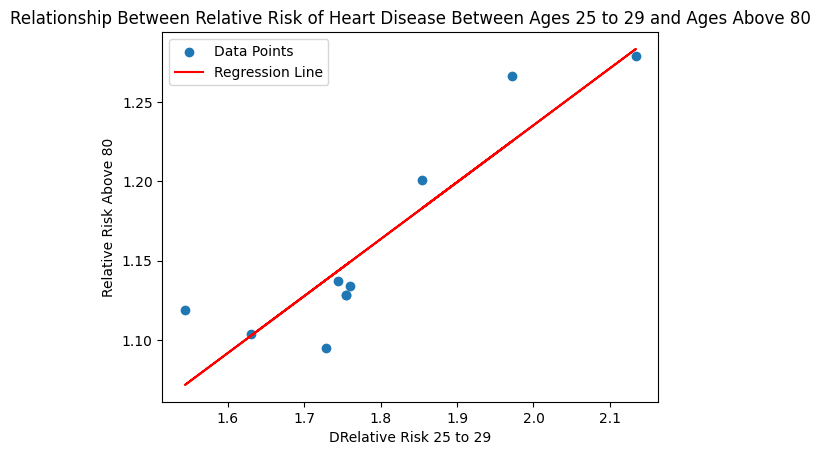

In [49]:
X = hd['Relative Risk 25 to 29']
y = hd['Relative Risk Above 80']

# Add a constant (intercept) to the independent variable (X)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Plot the data points and regression line
plt.scatter(hd['Relative Risk 25 to 29'], hd['Relative Risk Above 80'], label='Data Points')
plt.plot(hd['Relative Risk 25 to 29'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('DRelative Risk 25 to 29')
plt.ylabel('Relative Risk Above 80')
plt.title('Relationship Between Relative Risk of Heart Disease Between Ages 25 to 29 and Ages Above 80')
plt.legend()
plt.show()






## Summary
Question: Does the relative risk of heart disease between ages 25 to 29 predict the relative risk of heart disease above 80?

Null Hypothesis (H0): There is no significant linear relationship between the relative risk of heart disease between ages 25 to 29 and the relative risk of heart disease above 80.

Alternative Hypothesis (H1): There is a significant linear relationship between the relative risk of heart disease between ages 25 to 29 and the relative risk of heart disease above 80.

P-Value Analysis: The p-value associated with the F-statistic is 0.000312, which is less than the common significance level of 0.05. This suggests that there is a significant linear relationship between the two variables, therefore reject the null hypothesis.